# Problem Statement
### Prediction of Profit on the basis of expenditure of	R&D Spend	Administration,Marketing Spend,State
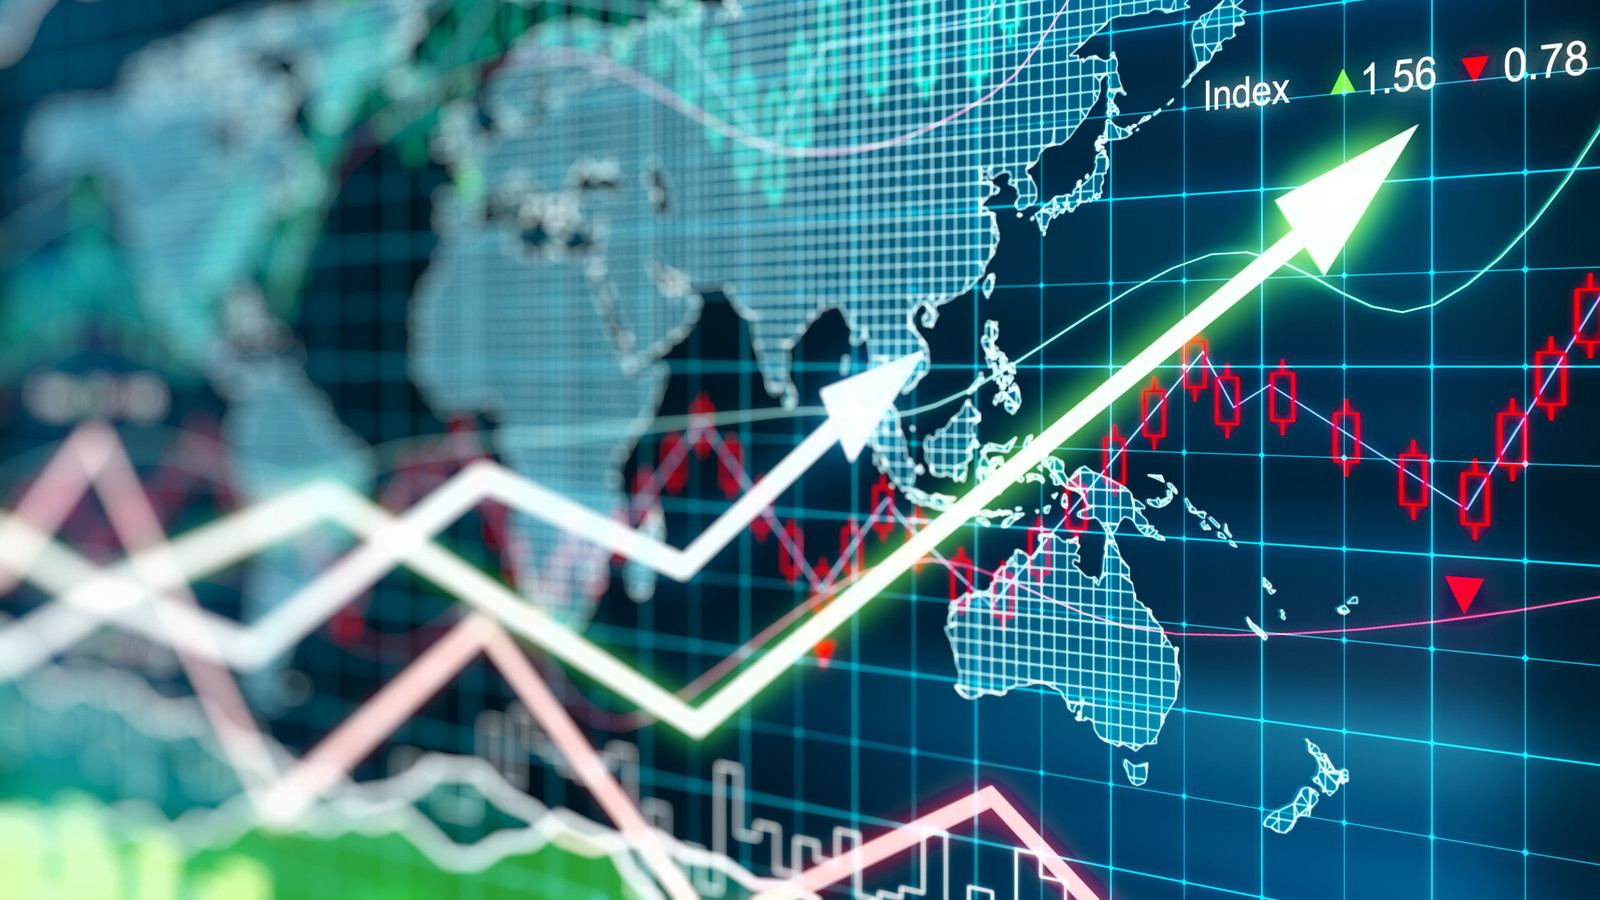

### 1. import the libraries

In [56]:
# importing all important libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 2. load the dataset and extract independent and dependent variable.

In [57]:
# loading dataset and extracting independent and dependent variables.
companies = pd.read_csv('1000_Companies.csv')
x = companies.iloc[:,:-1].values
y = companies.iloc[:, 4].values

In [58]:
x

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       ...,
       [100275.47, 241926.31, 227142.82, 'California'],
       [128456.23, 321652.14, 281692.32, 'California'],
       [161181.72, 270939.86, 295442.17, 'New York']], dtype=object)

In [59]:
y

array([192261.83   , 191792.06   , 191050.39   , 182901.99   ,
       166187.94   , 156991.12   , 156122.51   , 155752.6    ,
       152211.77   , 149759.96   , 146121.95   , 144259.4    ,
       141585.52   , 134307.35   , 132602.65   , 129917.04   ,
       126992.93   , 125370.37   , 124266.9    , 122776.86   ,
       118474.03   , 111313.02   , 110352.25   , 108733.99   ,
       108552.04   , 107404.34   , 105733.54   , 105008.31   ,
       103282.38   , 101004.64   ,  99937.59   ,  97483.56   ,
        97427.84   ,  96778.92   ,  96712.8    ,  96479.51   ,
        90708.19   ,  89949.14   ,  81229.06   ,  81005.76   ,
        78239.91   ,  77798.83   ,  71498.49   ,  69758.98   ,
        65200.33   ,  64926.08   ,  49490.75   ,  42559.73   ,
        35673.41   ,  14681.4    , 123485.2464 ,  82155.48418,
       125867.0108 , 104976.1696 ,  89803.10053,  75297.23305,
       114284.5283 , 171985.0761 ,  72337.96774, 169566.5772 ,
       158670.9451 , 114522.8756 ,  85842.60573, 101106

In [60]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [61]:
companies.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000
999,161181.72,270939.860,295442.1700,New York,476485.43000


In [62]:
companies['State'].value_counts()

California    344
New York      334
Florida       322
Name: State, dtype: int64

### 3. Data visulizations

<AxesSubplot:>

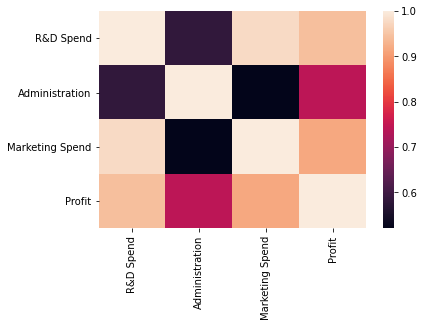

In [63]:
# data visulaisation
# building correlation matrix
sns.heatmap(companies.corr())

### 4. Encoding catogorial data

In [108]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
x[:, 3] = labelencoder.fit_transform(x[:,3])
onehotencoder = OneHotEncoder()
x =onehotencoder.fit_transform(x).toarray()

In [112]:
dummies=pd.get_dummies(companies.State)
dummies

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
...,...,...,...
995,1,0,0
996,1,0,0
997,1,0,0
998,1,0,0


concatinate dummies dataframe with original data fram

In [114]:
merged=pd.concat([companies,dummies],axis='columns')

In [116]:
merged

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.800,471784.1000,New York,192261.83000,0,0,1
1,162597.70,151377.590,443898.5300,California,191792.06000,1,0,0
2,153441.51,101145.550,407934.5400,Florida,191050.39000,0,1,0
3,144372.41,118671.850,383199.6200,New York,182901.99000,0,0,1
4,142107.34,91391.770,366168.4200,Florida,166187.94000,0,1,0
...,...,...,...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251,1,0,0
996,134970.00,130390.080,329204.0228,California,164336.60550,1,0,0
997,100275.47,241926.310,227142.8200,California,413956.48000,1,0,0
998,128456.23,321652.140,281692.3200,California,333962.19000,1,0,0


We need to drop original state columns from dataset.

In [118]:
final = merged.drop(['State'],axis='columns')

In [119]:
final

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.800,471784.1000,192261.83000,0,0,1
1,162597.70,151377.590,443898.5300,191792.06000,1,0,0
2,153441.51,101145.550,407934.5400,191050.39000,0,1,0
3,144372.41,118671.850,383199.6200,182901.99000,0,0,1
4,142107.34,91391.770,366168.4200,166187.94000,0,1,0
...,...,...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,95279.96251,1,0,0
996,134970.00,130390.080,329204.0228,164336.60550,1,0,0
997,100275.47,241926.310,227142.8200,413956.48000,1,0,0
998,128456.23,321652.140,281692.3200,333962.19000,1,0,0


### 5.Dummy variable trap

In [123]:
final = merged.drop(['California','State'],axis='columns')

In [124]:
final

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.800,471784.1000,192261.83000,0,1
1,162597.70,151377.590,443898.5300,191792.06000,0,0
2,153441.51,101145.550,407934.5400,191050.39000,1,0
3,144372.41,118671.850,383199.6200,182901.99000,0,1
4,142107.34,91391.770,366168.4200,166187.94000,1,0
...,...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,95279.96251,0,0
996,134970.00,130390.080,329204.0228,164336.60550,0,0
997,100275.47,241926.310,227142.8200,413956.48000,0,0
998,128456.23,321652.140,281692.3200,333962.19000,0,0


In [ ]:
Lets again create independent and dependent variables.

In [127]:
X = final.drop('Profit',axis='columns')

In [128]:
X

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.800,471784.1000,0,1
1,162597.70,151377.590,443898.5300,0,0
2,153441.51,101145.550,407934.5400,1,0
3,144372.41,118671.850,383199.6200,0,1
4,142107.34,91391.770,366168.4200,1,0
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,0,0
996,134970.00,130390.080,329204.0228,0,0
997,100275.47,241926.310,227142.8200,0,0
998,128456.23,321652.140,281692.3200,0,0


In [129]:
Y=final.Profit

In [130]:
Y

0      192261.83000
1      191792.06000
2      191050.39000
3      182901.99000
4      166187.94000
           ...     
995     95279.96251
996    164336.60550
997    413956.48000
998    333962.19000
999    476485.43000
Name: Profit, Length: 1000, dtype: float64

### 7. Spliting the data into train and test set

In [133]:
X

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.800,471784.1000,0,1
1,162597.70,151377.590,443898.5300,0,0
2,153441.51,101145.550,407934.5400,1,0
3,144372.41,118671.850,383199.6200,0,1
4,142107.34,91391.770,366168.4200,1,0
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,0,0
996,134970.00,130390.080,329204.0228,0,0
997,100275.47,241926.310,227142.8200,0,0
998,128456.23,321652.140,281692.3200,0,0


In [134]:
Y

0      192261.83000
1      191792.06000
2      191050.39000
3      182901.99000
4      166187.94000
           ...     
995     95279.96251
996    164336.60550
997    413956.48000
998    333962.19000
999    476485.43000
Name: Profit, Length: 1000, dtype: float64

In [137]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2, random_state=0)

### 7. Fitting Multiple Linear Regression Model to Training set

In [139]:
from sklearn.linear_model import LinearRegression
model_fit = LinearRegression()
model_fit.fit(X_train,Y_train)

LinearRegression()

### 8. Predicting the test set results.

In [140]:
Y_pred = model_fit.predict(X_test)

In [147]:
Y_pred

array([ 89790.61532916,  88427.07187361,  94894.67836972, 175680.8672561 ,
        83411.73042089, 110571.90200074, 132145.2293644 ,  91473.37719687,
       164597.05380606,  53222.82667401,  66950.1905099 , 150566.43987004,
       126915.20858596,  59337.85971051, 177513.91053061,  75316.28143051,
       118248.14406603, 164574.40699901, 170937.28981069, 182069.11645084,
       118845.03252689,  85669.95112229, 180992.59396143,  84145.08220145,
       105005.83769214, 101233.56772747,  53831.07669092,  56881.41475225,
        68896.39346905, 210040.00765883, 120778.72270894, 111724.87157654,
       101487.90541518, 137959.02649623,  63969.95996744, 108857.91214126,
       186014.72531987, 171442.64130747, 174644.26529204, 117671.49128195,
        96731.37857434, 165452.25779409, 107724.34331255,  50194.54176914,
       116513.89532178,  58632.48986821, 158416.46827609,  78541.4852161 ,
       159727.66671743, 131137.87699644, 184880.70924515, 174609.08266879,
        93745.66352059,  

### 9. Calculating the coefficients and intercepts

In [153]:
# Coefficients
print(model_fit.coef_)

[ 5.25845857e-01  8.44390881e-01  1.07574255e-01 -8.80536598e+02
 -6.98169073e+02]


In [154]:
# Intercepts
print(model_fit.intercept_)

-51035.22972402474


### 10. Evaluating Models.

### A. Linear Regression

In [155]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.9112695892268794

In [159]:
model_fit.score(X,Y)

0.947495316864675

In [157]:
model_fit.predict([[165349.20,136897.800,471784.1000,0,1]])

array([201561.87025674])

In [183]:
Y_train_pred =model_fit.predict(X_train)
Y_test_pred =model_fit.predict(X_test)

In [184]:
from sklearn.metrics import mean_squared_error, r2_score
train_mse = mean_squared_error(Y_train, Y_train_pred)
train_r2 = r2_score(Y_train, Y_train_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
test_r2 = r2_score(Y_test, Y_test_pred)

In [196]:
lr_results = pd.DataFrame(['Linear regression',train_mse, train_r2, test_mse, test_r2]).transpose()
lr_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

In [197]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,72565944.956546,0.95855,192148061.815081,0.91127


### 2. Random forest

In [198]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=42)
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=2, random_state=42)

In [199]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [ ]:
Model performance

In [202]:
from sklearn.metrics import mean_squared_error, r2_score
rf_train_mse = mean_squared_error(Y_train, y_rf_train_pred)
rf_train_r2 = r2_score(Y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(Y_test, y_rf_test_pred)
rf_test_r2 = r2_score(Y_test, y_rf_test_pred)

In [203]:
rf_results = pd.DataFrame(['Random forest',rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

In [204]:
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,151456986.720082,0.913486,318251639.551727,0.853037


### 3. ExtraTreeRegressor

In [205]:
from sklearn.tree import ExtraTreeRegressor
et = ExtraTreeRegressor(random_state=42)
et.fit(X_train, Y_train)

ExtraTreeRegressor(random_state=42)

In [206]:
y_et_train_pred = et.predict(X_train)
y_et_test_pred = et.predict(X_test)

In [207]:
from sklearn.metrics import mean_squared_error, r2_score
et_train_mse = mean_squared_error(Y_train, y_et_train_pred)
et_train_r2 = r2_score(Y_train, y_et_train_pred)
et_test_mse = mean_squared_error(Y_test, y_et_test_pred)
et_test_r2 = r2_score(Y_test, y_et_test_pred)

In [208]:
et_results = pd.DataFrame(['Extraa Tree',et_train_mse, et_train_r2, et_test_mse, et_test_r2]).transpose()
et_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

In [209]:
et_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Extraa Tree,0.0,1.0,436501853.055022,0.798432


In [210]:
pd.concat([lr_results, rf_results,et_results])

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,72565944.956546,0.95855,192148061.815081,0.91127
0,Random forest,151456986.720082,0.913486,318251639.551727,0.853037
0,Extraa Tree,0.0,1.0,436501853.055022,0.798432


Text(0.5, 0, 'Experimental Price')

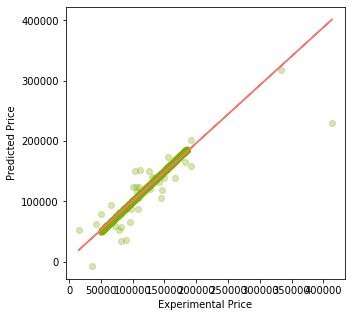

In [214]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5,5))
plt.scatter(x=Y_train, y=Y_train_pred, c="#7CAE00", alpha=0.3)
z = np.polyfit(Y_train, Y_train_pred, 1)
p = np.poly1d(z)
plt.plot(Y_train,p(Y_train),"#F8766D")
plt.ylabel('Predicted Price')
plt.xlabel('Experimental Price')

Let’s take a look at some example regressors that we can choose from:
- sklearn.linear_model.Ridge
- sklearn.linear_model.SGDRegressor
- sklearn.ensemble.ExtraTreesRegressor
- sklearn.ensemble.GradientBoostingRegressor
- sklearn.neighbors.KNeighborsRegressor
- sklearn.neural_network.MLPRegressor
- sklearn.tree.DecisionTreeRegressor
- sklearn.tree.ExtraTreeRegressor
- sklearn.svm.LinearSVR
- sklearn.svm.SVR